# Statystyka matematyczna - ćwiczenia laboratoryjne

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

---

# Zestaw zadań 10: Weryfikacja hipotez statystycznych - testy nieparametryczne

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Funkcje do wykorzystania

In [3]:
def vizualize_test_result(pdf, statistic, rejection_region):
    """
    Parameters
    -------
    pdf: pandas.DataFrame
        Tablica zawierająca informacje niezbędne do wykreślenia funkcji gęstości prawdopodobieństwa wykorzystywanego w teście rozkładu
        teoretycznego - index z wariantami zmiennej losowej i nadaną nazwą zmiennej (np. x) oraz pojedynczą kolumnę z wartościami
        gęstościami prawdopodobieństwa wyliczonymi dla poszczególnych wariantów o nadanej nazwie bazującej na nazwie zmiennej (np. f(x)).
    statistic: float
        Wartość statystyki testowej wyliczonej na podstawie próby losowej.
    rejection_region: list
        Lista zawierająca trzy elementy pozwalające na określenie obszaru krytycznego w następującej kolejności:
         - wartość dolnej granicy przedziału,
         - wartość górnej granicy przedziału,
         - "inner" lub "outer" w zależności od tego, czy ma być zakolorowana wewnętrzna, czy zewnętrzna część przedziału.
    """
    pdf_name= pdf.columns[0]
    
    fig, axes = plt.subplots(1, 1, figsize=(8, 3), facecolor='white')

    axes.plot(pdf.index, pdf[pdf_name], color="grey")

    if rejection_region[2]=="inner":
        axes.fill_between(pdf.index, pdf[pdf_name], 0, where=((pdf.index > rejection_region[0]) & (pdf.index<rejection_region[1])), color='red', alpha=0.5)
    elif rejection_region[2]=="outer":
        axes.fill_between(pdf.index, pdf[pdf_name], 0, where=((pdf.index < rejection_region[0]) | (pdf.index>rejection_region[1])), color='red', alpha=0.5)
    
    axes.vlines(x=statistic, ymin=0, ymax=np.max(pdf[pdf_name]/3), color="blue")
    
    axes.set_xlabel(pdf.index.name)
    axes.set_ylabel(pdf_name)

### Zadanie 1: Test zgodności chi-kwadrat [10 pkt]

Zmienna `sample` zawiera wyniki 50 krotnego powtórzenia doświadczenia, w którym rzucamy monetą 20 razy i zapisujemy liczbę orłów, które wypadły w serii rzutów.

Przygotuj dane oraz napisz funkcję `chi2_NHST()`, która zostanie wykorzystana do weryfikacji hipotezy, że wykorzystana w doswiadczeniu moneta była uczciwa (prawdopodobieństwo wyrzucenia orła i reszki jest równe).

In [4]:
sample = np.array([ 9, 10, 11, 11,  8,  7, 14,  7, 14, 12,
                   14, 11,  9, 11, 15, 14, 11, 12,  8, 13,
                    9, 12,  7,  8, 10,  9, 14,  9,  8, 11,
                    8, 10,  5, 10,  8, 10, 13, 10, 14, 10,
                    8,  9, 14, 14,  8, 10,  9, 13, 10, 14])

#### a) Przygotowanie danych

Oblicz prawdopodobieństwa wystąpienia określonej liczby sukcesów (0, 1, 2 ...) w 20 niezależnych powtórzeniach doświaczenia o prawdopodobieństwie sukcesu równym 0.5. Wyniki zestaw w tabeli `theoretical_distribution` o następującej strukturze:

> Indeks:</br>
> x - warianty przyjmowane przez zmienną X.</br>

> Kolumny:</br>
> P(x) - prawdopodobieństwo wystąpienia poszczególnych wariantów.

Przygotuj szereg rozdzielczy wystąpienia określonej liczby orłów w seriach 20 rzutów monetą. Wyniki zestaw w tabeli `tested_distribution` o następującej strukturze:

> Indeks:</br>
> x - warianty przyjmowane przez zmienną X (identyczne jak w poprzedniej tablicy).</br>

> Kolumny:</br>
> N(x) - zliczenia wystąpienia poszczególnych wariantów.

In [5]:
# Tabela funkcji rozkładu prawdopodobieństwa rozkładu teoretycznego
# YOUR CODE HERE
from scipy.stats import binom
n = 20  
p = 0.5  
x_values = np.arange(0, n+1) 
# Tabela rozkładu teoretycznego
theoretical_probs = binom.pmf(x_values, n, p)
theoretical_distribution = pd.DataFrame({'P(x)': theoretical_probs}, index=x_values)
theoretical_distribution.index.name = 'x'
theoretical_distribution.head(10)


,P(x)
x,
0,9.536743e-07
1,1.907349e-05
2,1.811981e-04
3,1.087189e-03
4,4.620552e-03
5,1.478577e-02
6,3.696442e-02
7,7.392883e-02
8,1.201344e-01


In [6]:
# Komórka testowa
assert type(theoretical_distribution) == pd.DataFrame
assert theoretical_distribution.shape == (21, 1)
assert list(theoretical_distribution.columns) == ["P(x)"]
assert theoretical_distribution.index.name == 'x'
assert np.isclose(np.sum(theoretical_distribution.index.values), 210)
assert np.isclose(np.sum(theoretical_distribution["P(x)"]), 1)

In [7]:
# Tabela szeregu rozdzielczego próby losowej
# YOUR CODE HERE
from scipy.stats import binom
value_counts = pd.Series(sample).value_counts().sort_index()
tested_distribution = pd.DataFrame({'N(x)': value_counts}, index=x_values).fillna(0).astype(int)
tested_distribution.index.name = 'x'
tested_distribution.head(10)

,N(x)
x,
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,3
8,8


In [8]:
# Komórka testowa
assert type(tested_distribution) == pd.DataFrame
assert tested_distribution.shape == (21, 1)
assert list(tested_distribution.columns) == ["N(x)"]
assert tested_distribution.index.name == 'x'
assert np.isclose(np.sum(tested_distribution.index.values), 210)
assert np.isclose(np.sum(tested_distribution["N(x)"]), 50)

#### b) Test zgodności chi-kwadrat

Przygotuj funkcję `chi2_NHST()`, która będzie weryfikować test zgodności chi-kwadrat i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w dołączonym do notatnika zestawie wzorów, w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna wykorzystywać udostępnioną na początku notatnika funkcję `vizualize_test_result()` do generowania wykresu zawierającego:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wskazującą obliczoną wartość statystyki.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chisquare, chi2

def visualize_test_result(pdf, statistic, rejection_region):
    """
    Parameters
    ----------
    pdf: pandas.DataFrame
        Tablica z indeksem = wartości statystyki i kolumną = gęstość rozkładu teoretycznego.
    statistic: float
        Obliczona wartość statystyki testowej.
    rejection_region: list
        [dolna_granica, górna_granica, "inner"|"outer"] – określa obszar krytyczny.
    """
    pdf_name = pdf.columns[0]
    fig, ax = plt.subplots(figsize=(8,3))
    ax.plot(pdf.index, pdf[pdf_name], color="grey")
    if rejection_region[2] == "inner":
        mask = (pdf.index > rejection_region[0]) & (pdf.index < rejection_region[1])
    else:
        mask = (pdf.index < rejection_region[0]) | (pdf.index > rejection_region[1])
    ax.fill_between(pdf.index, pdf[pdf_name], 0, where=mask, color='red', alpha=0.5)
    ax.vlines(statistic, 0, pdf[pdf_name].max()/3, color="blue")
    ax.set_xlabel(pdf.index.name)
    ax.set_ylabel(pdf_name)

def chi2_NHST(tested_distribution: pd.DataFrame,
              theoretical_distribution: pd.DataFrame,
              alpha: float):
    """
    Parameters
    ----------
    tested_distribution : pandas.DataFrame
        DataFrame z indeksem "x" i kolumną "N(x)".
    theoretical_distribution : pandas.DataFrame
        DataFrame z indeksem "x" i kolumną "P(x)".
    alpha : float
        Poziom istotności testu.

    Returns
    -------
    chi2_stat : float
    chi2_crit : float
    H : int
        0 – nie odrzucamy H0, 1 – odrzucamy H0.
    """
    # obserwowane i oczekiwane
    obs = tested_distribution.iloc[:,0].to_numpy()
    probs = theoretical_distribution.iloc[:,0].to_numpy()
    N = obs.sum()
    exp = probs * N

    # statystyka χ²
    chi2_stat, _ = chisquare(f_obs=obs, f_exp=exp)

    # wartość krytyczna
    df = len(obs) - 1
    chi2_crit = chi2.ppf(1 - alpha, df)

    # decyzja
    H = int(chi2_stat > chi2_crit)

    # przygotuj PDF chi² do wizualizacji
    x_min = chi2.ppf(0.0001, df)
    x_max = chi2.ppf(0.9999, df)
    x_vals = np.linspace(x_min, x_max, 1000)
    pdf_vals = chi2.pdf(x_vals, df)
    pdf_df = pd.DataFrame(pdf_vals, index=x_vals, columns=[f'f_χ²(df={df})'])
    
    # kolorujemy ogon prawy
    visualize_test_result(pdf_df, chi2_stat, [0, chi2_crit, 'outer'])

    return chi2_stat, chi2_crit, H


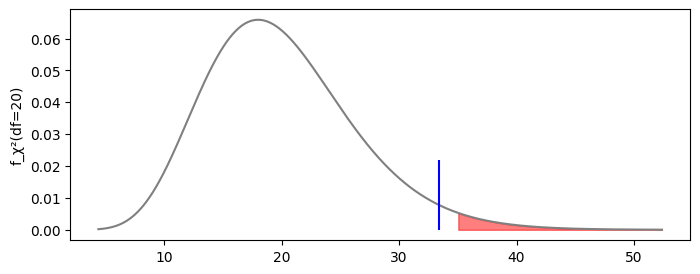

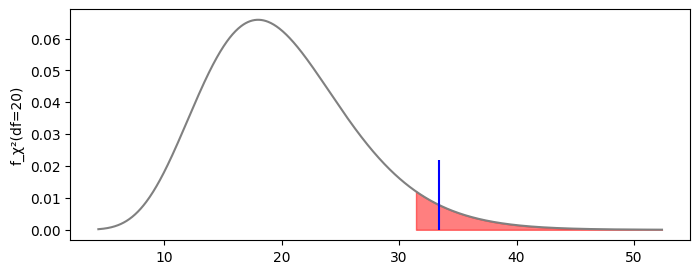

In [10]:
# Komórka testowa
assert np.all(np.isclose(chi2_NHST(tested_distribution, theoretical_distribution, 0.02), (33.3612131026868, 35.01962554059928, 0)))
assert np.all(np.isclose(chi2_NHST(tested_distribution, theoretical_distribution, 0.05), (33.3612131026868, 31.410432844230918, 1)))

### Zadanie 2: Weryfikacja hipotez z wykorzystaniem dedykowanych funkcji [10 pkt]

Zmienna `penguins` zawiera wyniki badań przeprowadzonych na pingwinach trzech różnych gatunków.

In [11]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


#### a) 

Korzystając z funkcji `scipy.stats.shapiro()` zweryfikuj hipotezę, że głębokość dzioba pingwinów gatunku Gentoo ma rozkład normalny. W obliczeniach przyjmij poziom istotności 1 - alpha = 0.95.

Zapisz obliczoną wartość pvalue do zmiennej `pvalue_1`, oraz przygotuj zmienną `H_1` zawierającą wynik testu statystycznego (0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha, 1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha).

Uwagi do wykonania zadania:
 - ustaw następującą wartość argumentu funkcji wykonującej test statystyczny odpowiedzialnego za radzenie sobie z wartościami nan: `nan_policy="omit"`.

In [12]:
from scipy.stats import shapiro

# dane Gentoo
data_gentoo = penguins.loc[penguins['species'] == 'Gentoo', 'bill_depth_mm']

# test Shapiro-Wilka z pominięciem nan-ów
statistic_1, pvalue_1 = shapiro(data_gentoo, nan_policy='omit')

# poziom istotności
alpha = 1 - 0.95  # czyli 0.05

# wynik testu: 1 jeśli odrzucamy H0 (pvalue < alpha), 0 w przeciwnym razie
H_1 = int(pvalue_1 < alpha)


In [13]:
# Komórka testowa
assert np.isclose(pvalue_1, 0.027695094782335943)
assert H_1 == 1

#### b) 

Korzystając z funkcji `scipy.stats.ks_1samp()` lub `scipy.stats.kstest()` zweryfikuj hipotezę, że długość skrzydeł pingwinów gatunku Adelie ma rozkład normalny o wartości oczekiwanej 190 i odchyleniu standardowym 6. W obliczeniach przyjmij poziom istotności 1 - alpha = 0.9.

Zapisz obliczoną wartość pvalue do zmiennej `pvalue_2`, oraz przygotuj zmienną `H_2` zawierającą wynik testu statystycznego (0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha, 1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha).

Uwagi do wykonania zadania:
 - ustaw następującą wartość argumentu funkcji wykonującej test statystyczny odpowiedzialnego za radzenie sobie z wartościami nan: `nan_policy="omit"`.

In [14]:
from scipy.stats import kstest

# dane Adelie
data_adelie = penguins.loc[penguins['species'] == 'Adelie', 'flipper_length_mm']

# test Kołmogorowa–Smirnowa względem N(190, 6^2)
statistic_2, pvalue_2 = kstest(
    data_adelie,
    'norm',
    args=(190, 6),
    nan_policy='omit'
)

# poziom istotności
alpha = 1 - 0.9  # czyli 0.1

# wynik testu: 1 jeśli odrzucamy H0 (pvalue < alpha), 0 w przeciwnym razie
H_2 = int(pvalue_2 < alpha)


In [15]:
# Komórka testowa
assert np.isclose(pvalue_2, 0.4388010272246816)
assert H_2 == 0

#### c) 

Korzystając z funkcji `scipy.stats.chisquare()` zweryfikuj hipotezę, że długość skrzydeł pingwinów gatunku Adelie ma rozkład normalny o wartości oczekiwanej 190 i odchyleniu standardowym 6. W obliczeniach przyjmij poziom istotności 1 - alpha = 0.9.

Zapisz obliczoną wartość pvalue do zmiennej `pvalue_3`, oraz przygotuj zmienną `H_3` zawierającą wynik testu statystycznego (0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha, 1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha).

Schemat wykonania zadania:
 - korzystając z funkcji `numpy.arange()` lub `numpy.linspace()` przygotuj macierz z granicami następujących przedziałów: [170, 173), [173, 176), ... , [209, 212],
 - korzystając z fukcji `numpy.histogram()` podziel zakres danych i zlicz ile wartości badanej cechy znajduje się w każdym z przedziałów,
 - korzystając z funkcji modułu `scipy.stats.norm` oblicz jakie jest prawdopodobieństwo wylosowania wartości z poszczególnych przedziałów dla testowanego rozkładu normalnego,
 - przelicz prawdopodobieństwa na liczebności toretyczne (ustandaryzuj je do sumy równej liczebności testowanedgo zestawu danych),
 - wykonaj test statystyczny korzysztając z funkcji `scipy.stats.chisquare()`.

In [16]:
from scipy.stats import chisquare, norm
import numpy as np

# dane Adelie
data_adelie = penguins.loc[
    penguins['species'] == 'Adelie',
    'flipper_length_mm'
].dropna()

# przygotowanie granic przedziałów [170,173], [173,176], …, [209,212]
edges = np.arange(170, 213, 3)

# 1) obserwowana częstość w każdym przedziale
obs_counts, _ = np.histogram(data_adelie, bins=edges)

# 2) teoretyczne prawdopodobieństwo każdego przedziału pod N(190, 6²)
dist = norm(loc=190, scale=6)
probs = dist.cdf(edges[1:]) - dist.cdf(edges[:-1])

# → normalizacja, by suma prawdopodobieństw wynosiła dokładnie 1
probs = probs / probs.sum()

# 3) oczekiwane liczebności (sumują się teraz dokładnie do N)
N = obs_counts.sum()
exp_counts = probs * N

# 4) test chi-kwadrat
statistic_3, pvalue_3 = chisquare(f_obs=obs_counts, f_exp=exp_counts)

# 5) decyzja przy α = 1 – 0.9 = 0.1
alpha = 1 - 0.9
H_3 = int(pvalue_3 < alpha)


In [17]:
# Komórka testowa
assert np.isclose(pvalue_3, 0.4216647220715661)
assert H_3 == 0

### d)

Korzystając z funkcji `scipy.stats.ks_2samp()` lub `scipy.stats.kstest()` zweryfikuj hipotezę, że długość skrzydeł pingwinów gatunku Adelie i Chinstrap mają taki sam rozkład statystyczny. W obliczeniach przyjmij poziom istotności 1 - alpha = 0.98.

Zapisz obliczoną wartość pvalue do zmiennej `pvalue_4`, oraz przygotuj zmienną `H_4` zawierającą wynik testu statystycznego (0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha, 1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha).

Uwagi do wykonania zadania:
 - ustaw następującą wartość argumentu funkcji wykonującej test statystyczny odpowiedzialnego za radzenie sobie z wartościami nan: `nan_policy="omit"`.

In [18]:
from scipy.stats import ks_2samp

# dane Adelie i Chinstrap
data_adelie = penguins.loc[penguins['species'] == 'Adelie', 'flipper_length_mm']
data_chinstrap = penguins.loc[penguins['species'] == 'Chinstrap', 'flipper_length_mm']

# test Kołmogorowa–Smirnowa dla dwóch prób
statistic_4, pvalue_4 = ks_2samp(
    data_adelie,
    data_chinstrap,
    nan_policy='omit'
)

# poziom istotności
alpha = 1 - 0.98  # czyli 0.02

# wynik testu: 1 jeśli odrzucamy H0 (pvalue < alpha), 0 w przeciwnym razie
H_4 = int(pvalue_4 < alpha)


In [19]:
assert np.isclose(pvalue_4, 5.6295807497561385e-06)
assert H_4 == 1